In [76]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve

In [77]:
file_s = pd.read_csv("tt-chi-sum.csv")
file_b = pd.read_csv("bbjj-chi-sum.csv")

In [78]:
file_s.keys()

Index(['Unnamed: 0', 'j1pT', 'j1Eta', 'j1Phi', 'j1Flavor', 'j2pT', 'j2Eta',
       'j2Phi', 'j2Flavor', 'j3pT', 'j3Eta', 'j3Phi', 'j3Flavor', 'j4pT',
       'j4Eta', 'j4Phi', 'j4Flavor', 'j5pT', 'j5Eta', 'j5Phi', 'j5Flavor',
       'j6pT', 'j6Eta', 'j6Phi', 'j6Flavor', 'j12M', 'j13M', 'j14M', 'j25M',
       'j23M', 'j24M', 'j34M', 'j35M', 'j45M', 'Chi-W', 'Chi-T'],
      dtype='object')

In [79]:
foo = file_s['j1Eta']

In [80]:
type(foo)

pandas.core.series.Series

In [81]:
file_b.keys()

Index(['Unnamed: 0', 'j1pT', 'j1Eta', 'j1Phi', 'j1Flavor', 'j2pT', 'j2Eta',
       'j2Phi', 'j2Flavor', 'j3pT', 'j3Eta', 'j3Phi', 'j3Flavor', 'j4pT',
       'j4Eta', 'j4Phi', 'j4Flavor', 'j5pT', 'j5Eta', 'j5Phi', 'j5Flavor',
       'j6pT', 'j6Eta', 'j6Phi', 'j6Flavor', 'j12M', 'j13M', 'j14M', 'j25M',
       'j23M', 'j24M', 'j34M', 'j35M', 'j45M', 'Chi-W', 'Chi-T'],
      dtype='object')

In [82]:
#df = pd.concat([file_s, file_b])
# df_s = file_s.drop("Unnamed: 0.1", axis='columns')
df_s = file_s.drop("Unnamed: 0", axis='columns')

In [83]:
df_s.columns

Index(['j1pT', 'j1Eta', 'j1Phi', 'j1Flavor', 'j2pT', 'j2Eta', 'j2Phi',
       'j2Flavor', 'j3pT', 'j3Eta', 'j3Phi', 'j3Flavor', 'j4pT', 'j4Eta',
       'j4Phi', 'j4Flavor', 'j5pT', 'j5Eta', 'j5Phi', 'j5Flavor', 'j6pT',
       'j6Eta', 'j6Phi', 'j6Flavor', 'j12M', 'j13M', 'j14M', 'j25M', 'j23M',
       'j24M', 'j34M', 'j35M', 'j45M', 'Chi-W', 'Chi-T'],
      dtype='object')

In [84]:
# df_b = file_b.drop("Unnamed: 0.1", axis='columns')
df_b = file_b.drop("Unnamed: 0", axis='columns')

In [85]:
df_b.columns

Index(['j1pT', 'j1Eta', 'j1Phi', 'j1Flavor', 'j2pT', 'j2Eta', 'j2Phi',
       'j2Flavor', 'j3pT', 'j3Eta', 'j3Phi', 'j3Flavor', 'j4pT', 'j4Eta',
       'j4Phi', 'j4Flavor', 'j5pT', 'j5Eta', 'j5Phi', 'j5Flavor', 'j6pT',
       'j6Eta', 'j6Phi', 'j6Flavor', 'j12M', 'j13M', 'j14M', 'j25M', 'j23M',
       'j24M', 'j34M', 'j35M', 'j45M', 'Chi-W', 'Chi-T'],
      dtype='object')

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

norm_sig = scaler.fit_transform(df_s)
norm_back = scaler.fit_transform(df_b)

norm_sig_df = pd.DataFrame(norm_sig, columns=df_s.columns)
norm_back_df = pd.DataFrame(norm_back, columns=df_b.columns)

norm_total_df = pd.concat([norm_sig_df, norm_back_df])
norm_total_df

,j1pT,j1Eta,j1Phi,j1Flavor,j2pT,j2Eta,j2Phi,j2Flavor,j3pT,j3Eta,...,j13M,j14M,j25M,j23M,j24M,j34M,j35M,j45M,Chi-W,Chi-T
0,0.641243,-0.824106,-0.525413,-0.624723,1.176251,-1.726791,0.459562,-0.580896,1.936539,-0.777487,...,0.221859,0.232627,0.757440,1.596213,1.237751,0.064207,-0.207285,-0.136670,0.273081,0.067301
1,0.515834,0.003526,1.012525,0.158916,0.374383,0.635108,0.061213,0.118356,0.790304,0.705576,...,-0.059797,-0.305765,-0.275139,-0.283829,-0.104059,-0.258256,-0.190079,-0.017064,-0.377279,-0.375306
2,-0.548016,2.787571,1.315933,-1.147149,-0.168650,1.424691,-0.049053,-0.580896,0.345555,0.487434,...,1.421206,4.579211,0.041620,-0.168338,1.485141,0.665163,-0.490805,0.758894,1.574657,1.433452
3,-1.127002,0.123292,-0.492683,-0.102297,-1.029847,-0.297575,-1.380728,0.118356,-0.893182,0.366400,...,-0.973742,-0.893496,-0.522370,-0.957241,-1.006782,-0.852910,-0.565387,-0.305855,-0.490642,-0.254580
4,0.272815,0.426948,0.795921,0.158916,0.123857,-0.690294,-0.337551,-0.813980,0.050003,-0.740121,...,-0.157834,-0.403490,-0.498563,-0.356299,-0.414749,-0.263170,-0.291797,-0.441967,-0.402497,-0.349324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.253542,0.660473,-1.195219,-0.145178,-0.013879,0.495499,0.243216,-0.171020,-0.217493,-0.745827,...,-0.223295,-0.419642,-0.687525,-0.458036,-0.658218,-0.673672,-0.453359,-0.615868,-0.497768,-0.394765
499996,-0.839396,-0.657857,-0.745244,-0.754943,-0.687651,0.759836,0.937720,-0.171020,-0.728202,0.121192,...,-0.815085,-0.883921,-0.678181,-0.828112,-0.648335,-0.789216,-0.722498,-0.554575,-0.525954,-0.358313
499997,-0.503407,0.416206,0.644823,-0.602502,0.057186,0.604318,-1.475031,-0.171020,0.383330,-0.184377,...,-0.791887,-0.242257,-0.671694,-0.571288,0.003753,-0.337340,-0.658722,-0.498216,-0.495493,-0.398707
499998,-1.041134,-1.462249,1.701259,2.293882,-0.735235,-2.189564,-0.457874,-0.894243,-0.838243,-1.194922,...,-0.342689,-0.387078,0.635275,0.811138,0.569949,-0.368443,-0.380094,-0.397833,-0.095388,-0.183308


In [87]:
ones = np.full(len(norm_sig_df), 1)
zeros = np.full(len(norm_back_df), 0)

signal = ak.from_numpy(np.concatenate((ones, zeros)))
x = norm_total_df
y = signal

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [88]:
len(ones), len(zeros)

(500000, 500000)

In [89]:
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [98]:
 model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_dim=35, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [99]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [116]:
model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=54)

Epoch 1/5
11852/11852 ━━━━━━━━━━━━━━━━━━━━ 11s 962us/step - accuracy: 0.9823 - loss: 0.0530 - val_accuracy: 0.9948 - val_loss: 0.0175
Epoch 2/5
11852/11852 ━━━━━━━━━━━━━━━━━━━━ 11s 956us/step - accuracy: 0.9820 - loss: 0.0536 - val_accuracy: 0.9943 - val_loss: 0.0177
Epoch 3/5
11852/11852 ━━━━━━━━━━━━━━━━━━━━ 12s 972us/step - accuracy: 0.9825 - loss: 0.0515 - val_accuracy: 0.9936 - val_loss: 0.0187
Epoch 4/5
11852/11852 ━━━━━━━━━━━━━━━━━━━━ 12s 968us/step - accuracy: 0.9825 - loss: 0.0517 - val_accuracy: 0.9945 - val_loss: 0.0170
Epoch 5/5
11852/11852 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9832 - loss: 0.0503 - val_accuracy: 0.9951 - val_loss: 0.0169


In [117]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

6250/6250 - 3s - 503us/step - accuracy: 0.9950 - loss: 0.0166

Test accuracy: 0.9950399994850159


In [118]:
future = model(x_train).numpy()
future

array([[9.9995482e-01],
       [1.0000000e+00],
       [7.7701502e-02],
       ...,
       [1.4368035e-19],
       [2.8013259e-02],
       [1.6118301e-13]], dtype=float32)

In [119]:
future_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
future_model(x_test)

/Users/beccahudson/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (200000, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


<tf.Tensor: shape=(200000, 1), dtype=float32, numpy=
array([[0.99999994],
       [0.99999994],
       [0.99999994],
       ...,
       [0.99999994],
       [0.99999994],
       [0.99999994]], dtype=float32)>

In [120]:
# model.fit(x_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test data to get predicted probabilities
y_probs = model.predict(x_test)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 571us/step


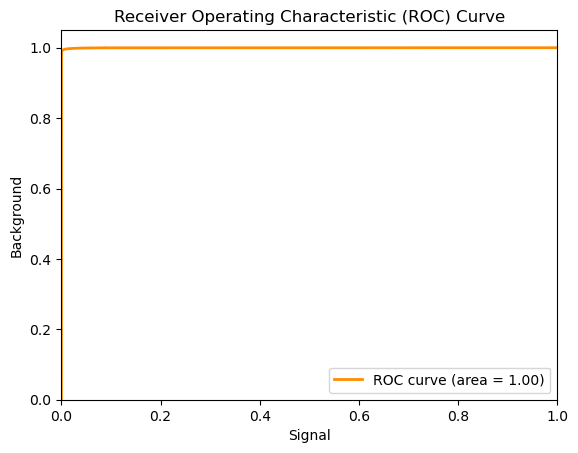

In [121]:
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Signal')
plt.ylabel('Background')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

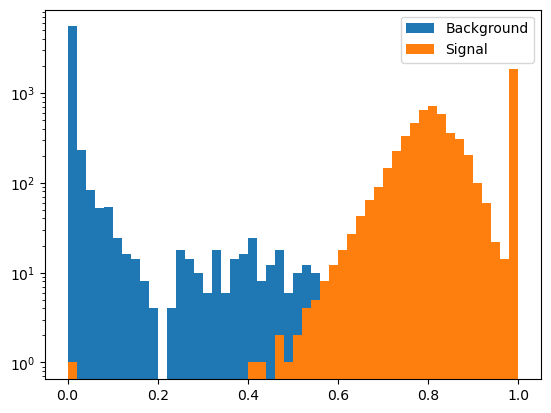

In [122]:
plt.hist(fpr, bins = 50, range = (0,1), label = "Background")
plt.hist(tpr, bins = 50, range = (0,1), label = "Signal")
plt.legend()
plt.yscale('log')
plt.show()

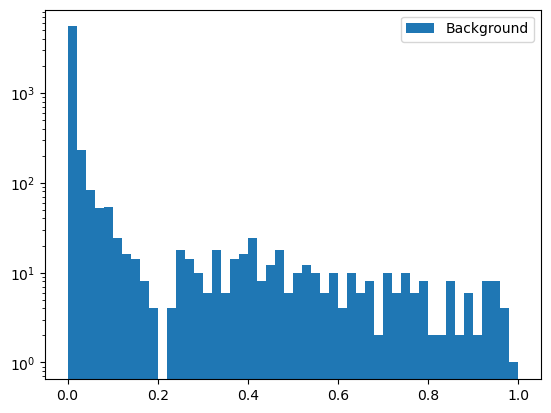

In [123]:
plt.hist(fpr, bins = 50, range = (0,1), label = "Background")
plt.legend()
plt.yscale('log')
plt.show()

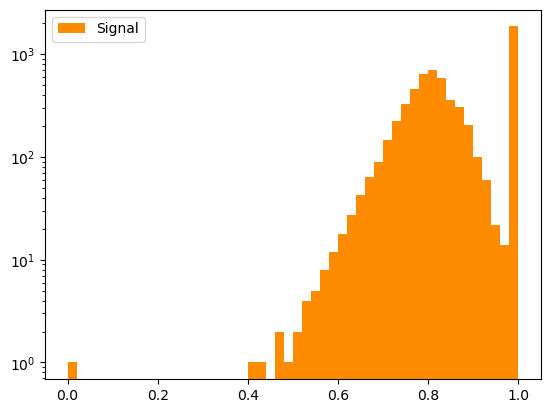

In [124]:
plt.hist(tpr, bins = 50, range = (0,1), label = "Signal", color='darkorange')
plt.legend()
plt.yscale('log')
plt.show()